# Logistic Regression

When output is modelled as linear combination of features # Linear Reg

log (odds) is modelled as linear combination of features  # Logistic 

output has two possible outcome - survived = 1 or 0

In [66]:
df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv', index_col = 0)

In [69]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
odds = 38/62

In [ ]:
odds = P/(1-P)

In [ ]:
log(p/(1-p))= mx + +c

In [ ]:
lhs = log(odds(survived))

In [ ]:
p/1-p = e**(mx+C)

In [ ]:
p = 1/(1+e**-mx-c)

In [87]:
X = pd.DataFrame(df.Pclass)
y = df.Survived # Step 0

In [88]:
# Logistic Regresssion in SkLearn

In [92]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression() # instantiate

logreg.fit(X, y) # fit

logreg.predict(X) #predict

In [94]:
predicted_survived = pd.Series(logreg.predict(X))
predicted_survived

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Length: 891, dtype: int64

In [106]:
from sklearn.metrics import confusion_matrix

In [108]:
df.Survived.shape

(891,)

In [107]:
confusion_matrix(df.Survived, predicted_survived)

array([[469,  80],
       [206, 136]])

In [95]:
df.Survived

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [96]:
df.Survived.mean()

0.3838383838383838

In [100]:
TSS = ((df.Survived - df.Survived.mean())**2).sum()
TSS

210.7272727272727

In [102]:
RSS = ((df.Survived - predicted_survived)**2).sum()
RSS

376.0

In [103]:
1 - RSS/TSS

-0.7842968075927528

In [105]:
logreg.predict_proba(X)

array([[0.7499951 , 0.2500049 ],
       [0.35690152, 0.64309848],
       [0.7499951 , 0.2500049 ],
       ...,
       [0.7499951 , 0.2500049 ],
       [0.35690152, 0.64309848],
       [0.7499951 , 0.2500049 ]])

## Agenda

1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Demonstrate how logistic regression works with categorical features
8. Compare logistic regression with other models

## Part 1: Predicting a Continuous Response

In [70]:
# glass identification dataset
import pandas as pd
import numpy as np
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


**Question:** Pretend that we want to predict **ri**, and our only feature is **al**. How could we do it using machine learning?

**Answer:** We could frame it as a regression problem, and use a linear regression model with **al** as the only feature and **ri** as the response.

**Question:** How would we **visualize** this model?

**Answer:** Create a scatter plot with **al** on the x-axis and **ri** on the y-axis, and draw the line of best fit.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

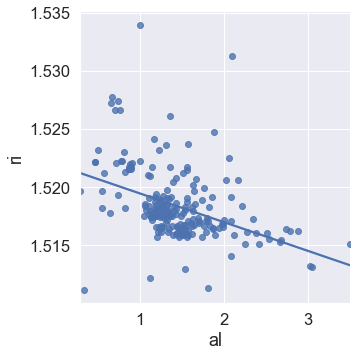

In [4]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

**Question:** How would we draw this plot without using Seaborn?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='al', ylabel='ri'>

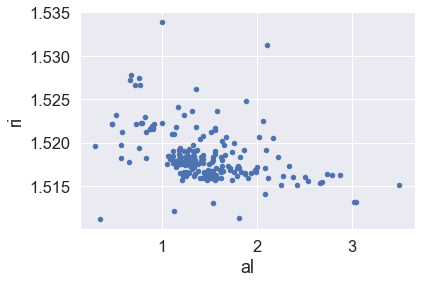

In [5]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

Text(0, 0.5, 'ri')

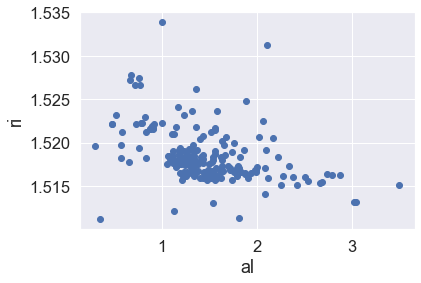

In [6]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [7]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression()

In [8]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0, 0.5, 'Predicted ri')

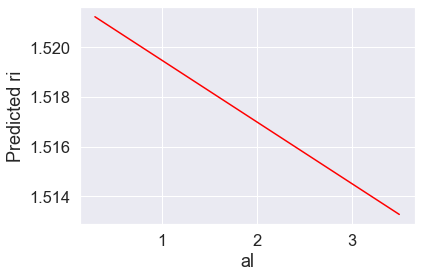

In [9]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0, 0.5, 'ri')

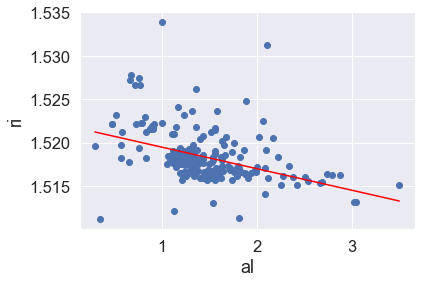

In [10]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [11]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [19]:
np.array([2]).reshape(1,-1)

array([[2]])

In [18]:
# compute prediction for al=2 using the predict method
linreg.predict(np.array([2]).reshape(1,-1))

array([1.51699012])

In [21]:
# examine coefficient for al
for i in zip(feature_cols, linreg.coef_):
    print(i)

('al', -0.0024776063874696235)


**Interpretation:** A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [22]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [24]:
# compute prediction for al=3 using the predict method
linreg.predict(np.array([3]).reshape(1,-1))

array([1.51451251])

## Part 2: Predicting a Categorical Response

In [25]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [26]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


Let's change our task, so that we're predicting **household** using **al**. Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'household')

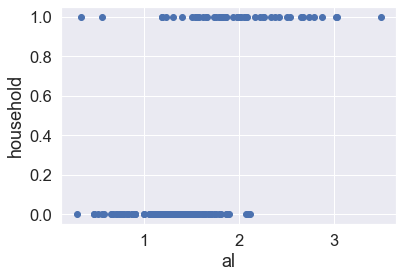

In [27]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Let's draw a **regression line**, like we did before:

In [28]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0, 0.5, 'household')

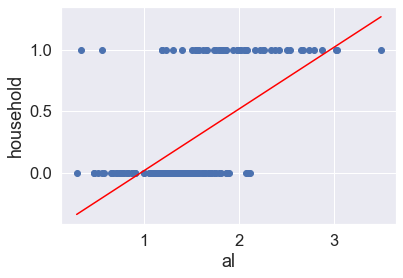

In [29]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [30]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [31]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


Text(0, 0.5, 'household')

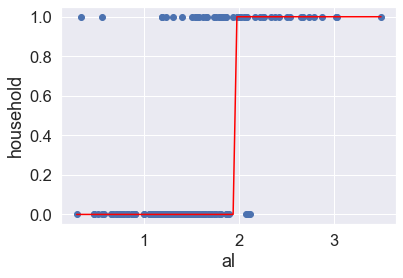

In [32]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Part 3: Using Logistic Regression Instead

Logistic regression can do what we just did:

In [33]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

Text(0, 0.5, 'household')

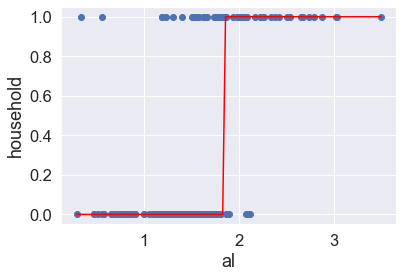

In [34]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [35]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

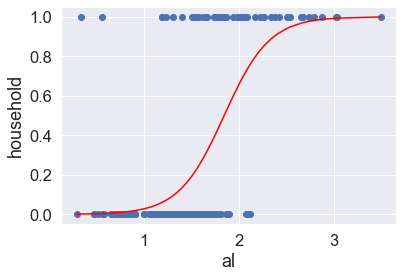

In [36]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [39]:
X

,al
id,
22,0.29
185,0.34
40,0.47
39,0.47
51,0.51
...,...
193,2.79
210,2.88
173,3.02


In [40]:
# examine some example predictions
print(logreg.predict_proba(np.array([1]).reshape(1,-1)))
print(logreg.predict_proba(np.array([2]).reshape(1,-1)))
print(logreg.predict_proba(np.array([3]).reshape(1,-1)))

[[0.97161741 0.02838259]]
[[0.34361466 0.65638534]]
[[0.00794181 0.99205819]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## Part 4: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [41]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [42]:
# exponential function: e^1
np.exp(1)

2.718281828459045

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [43]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.999896315728952

It is also the **inverse** of the exponential function:

In [44]:
np.log(np.exp(5))

5.0

In [45]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## Part 5: What is Logistic Regression?

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

## Part 6: Interpreting Logistic Regression Coefficients

Text(0, 0.5, 'household')

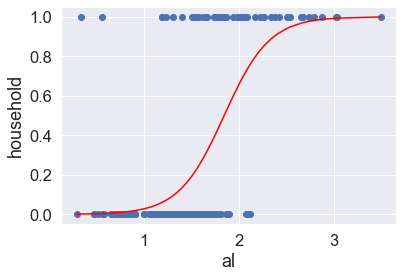

In [46]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [47]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([0.64722717])

In [48]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([1.91023671])

In [49]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.65638534])

In [52]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(np.array([2]).reshape(1,-1))[:, 1]

array([0.65638534])

In [53]:
# examine the coefficient for al
zip(feature_cols, logreg.coef_[0])

**Interpretation:** A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [54]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9920580839167457

In [57]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(np.array([3]).reshape(1,-1))[:, 1]

array([0.99205819])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [58]:
# examine the intercept
logreg.intercept_

array([-7.71359965])

**Interpretation:** For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [59]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.00044651])

That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'al' value.

![Logistic regression beta values](images/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

## Part 7: Using Logistic Regression with Categorical Features

Logistic regression can still be used with **categorical features**. Let's see what that looks like:

In [43]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)

Let's use Seaborn to draw the logistic curve:

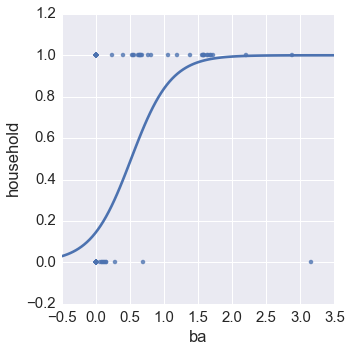

In [44]:
# original (continuous) feature
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

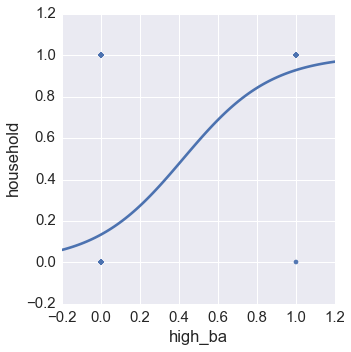

In [45]:
# categorical feature
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True)

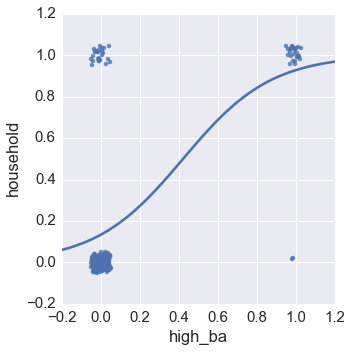

In [46]:
# categorical feature, with jitter added
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [47]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [48]:
# examine the coefficient for high_ba
zip(feature_cols, logreg.coef_[0])

[('high_ba', 4.4273153450187195)]

**Interpretation:** Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value).

## Part 8: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions